# DATA100 - Final Project: Storytelling with Data 

<hr>
<hr>

## Group 3 Members 
* Argonza, Antoinette Joy 
* Jamia, Gillian Nicole 
* Magsano, Niño Matthew 
* Reyes, Anton Gabriel

<hr>
<hr>

## Motivation

*As Lasallian students, we would want to determine the possible causes of child mortality and provide credible, consolidated information and insights that help prevent or solve this pressing social issue.*


<hr>
<hr>

## Libraries, Packages, or Modules

In [27]:
import os 
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point
from IPython.core.display import HTML

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
plt.style.use('seaborn-whitegrid')

<hr>
<hr>

## Data Collection

### Datasets

**Initial datasets:** <br>
Upon initial data collection and reading of datasets, these databases were dropped, but it is still listed here to show our initial trajectory towards the storytelling. The data collection codes for these are removed in the notebook to make it presentable. <br>
* (Removed) The dataset for **Mortality among children** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/mpwolke/cusersmarildownloadsdeathscsv) <br>
* (Removed) The dataset for **WHO - Immunization coverage estimates by country** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/lsind18/who-immunization-coverage) <br>
* (Removed) The dataset for **Child Health Dataset** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/hijest/child-health-dataset-who) <br>
* (Removed) The dataset for **Out of School Rates Global Data** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/komalkhetlani/out-of-school-rates-global-data?select=Primary.csv) <br>
* (Removed) The dataset for **World Health Statistics 2020** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete?select=adolescentBirthRate.csv) <br>

**Official datasets**: <br>
* The dataset for **Mortality rate, under-5 (per 1,000 live births)** can be found here: [`The World Bank` Dataset Source](https://data.worldbank.org/indicator/SH.DYN.MORT?end=2019&fbclid=IwAR1SIiyIcig6Mwin1-szdOQoKMCC6BMJrb0NrdbS1-bnL8gd2JoalibPjYI&start=1960) <br>
* The dataset for **Causes of death in children under 5** can be found here: [`Our World in Data` Dataset Source](https://ourworldindata.org/grapher/causes-of-death-in-children-under-5) <br>
* The dataset for **Malnutrition across the globe** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/ruchi798/malnutrition-across-the-globe) <br>

**Helpful dataset/s**: <br>
These/This are/is included for possible merges of cleaned databases for data visualization and analysis. <br>
* The dataset for **Country Codes Alpha-2 & Alpha-3** can be found here: [`IBAN` Dataset Source](https://www.iban.com/country-codes) <br>

<hr>
<hr>

## Data Wrangling & Exploratory Data Analysis

<hr>

### Mortality rate, under-5 (per 1,000 live births)

In [29]:
mortality = pd.read_csv('Databases/mortality_rate.csv')
mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659,NaN
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,344.6,338.7,333.100000,327.600000,...,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000,NaN
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,308.353805,302.620962,...,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240,NaN
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000,NaN


In [30]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            112 non-null    float64
 5   1961            112 non-null    float64
 6   1962            116 non-null    float64
 7   1963            119 non-null    float64
 8   1964            124 non-null    float64
 9   1965            127 non-null    float64
 10  1966            129 non-null    float64
 11  1967            133 non-null    float64
 12  1968            137 non-null    float64
 13  1969            142 non-null    float64
 14  1970            144 non-null    float64
 15  1971            149 non-null    float64
 16  1972            153 non-null    float64
 17  1973            153 non-null    flo

In [31]:
mortality.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,112.000000,112.000000,116.000000,119.000000,124.000000,127.000000,129.000000,133.000000,137.000000,142.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,0.0
mean,151.166071,146.613393,149.111207,146.794958,146.716563,145.343472,143.094516,139.498974,134.915993,132.530716,...,38.006505,36.644066,35.375455,34.254044,33.178938,32.107112,31.126408,30.145293,29.214801,NaN
std,95.556097,94.282688,98.883656,99.767226,99.983448,100.351548,98.926580,97.909379,96.274734,95.129489,...,36.033354,34.745564,33.555812,32.563909,31.620253,30.478658,29.595854,28.698271,27.841743,NaN
min,19.600000,19.200000,18.600000,17.900000,17.100000,16.300000,15.500000,14.900000,14.400000,13.900000,...,2.500000,2.400000,2.200000,2.100000,2.000000,1.900000,1.800000,1.700000,1.700000,NaN
25%,66.975000,64.450000,68.550000,64.300000,63.700000,62.500000,62.000000,60.500000,56.700000,55.775000,...,10.000000,9.800000,9.300000,8.900000,8.300000,8.000000,7.700000,7.400000,7.000000,NaN
50%,149.400000,146.500000,142.950000,137.100000,133.150000,127.900000,125.000000,119.100000,114.800000,108.550000,...,22.400000,21.800000,21.100000,20.600000,19.700000,19.100000,18.600000,18.100000,17.300000,NaN
75%,220.925000,215.900000,214.525000,210.900000,218.350000,215.700000,212.600000,210.600000,200.700000,201.150000,...,59.155108,56.800000,54.600000,52.600000,50.800000,49.000000,47.300000,45.600000,44.200000,NaN
max,391.700000,386.300000,409.800000,420.600000,413.500000,406.500000,399.900000,393.400000,387.300000,381.400000,...,153.200000,146.600000,142.100000,137.700000,138.300000,128.400000,124.400000,120.300000,117.200000,NaN


In [32]:
mortality.describe(include=object)

,Country Name,Country Code,Indicator Name,Indicator Code
count,266,266,266,266
unique,266,266,1,1
top,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT
freq,1,1,266,266


In [33]:
mortality.isnull().sum()*100/mortality.shape[0]

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960               57.894737
                     ...    
2016                9.398496
2017                9.398496
2018                9.398496
2019                9.398496
2020              100.000000
Length: 65, dtype: float64

In [34]:
mortality.duplicated().sum()

0

In [35]:
mortality.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

#### Since 2020 has no observations and the years below 2000 will not provide any sufficient recent conclusions and recommendations other than provide a downward trend, these columns or variables will be dropped to accomodate other databases which has lesser years as well. 

In [36]:
mortality.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2020'], axis=1, inplace=True)

mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,136.917815,131.670422,126.139085,120.635993,115.263632,110.060055,...,86.208587,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,128.700000,124.600000,120.400000,116.300000,112.100000,107.900000,...,87.600000,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,169.548432,164.533824,159.251950,153.916285,148.577352,143.417384,...,121.783272,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,203.900000,197.800000,190.900000,183.200000,174.600000,165.600000,...,120.300000,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000


In [37]:
mortality.isnull().sum()*100/mortality.shape[0]

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              9.398496
2001              9.398496
2002              9.398496
2003              9.398496
2004              9.398496
2005              9.398496
2006              9.398496
2007              9.398496
2008              9.398496
2009              9.398496
2010              9.398496
2011              9.398496
2012              9.398496
2013              9.398496
2014              9.398496
2015              9.398496
2016              9.398496
2017              9.398496
2018              9.398496
2019              9.398496
dtype: float64

#### Since there are 9.40% nulls, these can also be dropped in the table at it has neglible effect in the aggregated and summarized analysis. 

In [38]:
cleaned_mortality = mortality.dropna(axis=0)
cleaned_mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,136.917815,131.670422,126.139085,120.635993,115.263632,110.060055,...,86.208587,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,128.700000,124.600000,120.400000,116.300000,112.100000,107.900000,...,87.600000,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,169.548432,164.533824,159.251950,153.916285,148.577352,143.417384,...,121.783272,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,203.900000,197.800000,190.900000,183.200000,174.600000,165.600000,...,120.300000,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000
5,Albania,ALB,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,27.200000,25.800000,24.400000,22.900000,21.400000,20.000000,...,13.200000,12.100000,11.200000,10.400000,9.900000,9.600000,9.400000,9.400000,9.500000,9.700000


In [39]:
cleaned_mortality.isnull().sum()*100/cleaned_mortality.shape[0]

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
2000              0.0
2001              0.0
2002              0.0
2003              0.0
2004              0.0
2005              0.0
2006              0.0
2007              0.0
2008              0.0
2009              0.0
2010              0.0
2011              0.0
2012              0.0
2013              0.0
2014              0.0
2015              0.0
2016              0.0
2017              0.0
2018              0.0
2019              0.0
dtype: float64

In [40]:
cleaned_mortality['Country Name'].unique()

array(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividen

In [41]:
cleaned_mortality.to_csv('Databases/cleaned_mortality.csv')

In [51]:
cleaned_mortality = cleaned_mortality.sort_values(by = '2019', ascending=False).head(5)
cleaned_mortality.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
cleaned_mortality

KeyError: "['Country Code' 'Indicator Name' 'Indicator Code' '2000' '2001' '2002'\n '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'\n '2013' '2014' '2015' '2016' '2017' '2018'] not found in axis"

In [44]:
# here we specify the figure size as well to make it follow an aspect ratio we like
# the colors can also be set together with any other options for making the chart look "pretty"
ax = cleaned_mortality['2019'].plot(figsize=(500, 200), kind='bar', width=0.8)
#width is the space between the two bars

ax.set_xticklabels(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'European Union', 'Fragile and conflict affected situations',
       'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Guatemala', 'Guyana', 'High income', 'Honduras',
       'Heavily indebted poor countries (HIPC)', 'Croatia', 'Haiti',
       'Hungary', 'IBRD only', 'IDA & IBRD total', 'IDA total',
       'IDA blend', 'Indonesia', 'IDA only', 'India', 'Ireland',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya',
       'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevis',
       'Korea, Rep.', 'Kuwait',
       'Latin America & Caribbean (excluding high income)', 'Lao PDR',
       'Lebanon', 'Liberia', 'Libya', 'St. Lucia',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Sri Lanka', 'Lower middle income', 'Low & middle income',
       'Lesotho', 'Late-demographic dividend', 'Lithuania', 'Luxembourg',
       'Latvia', 'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives',
       'Middle East & North Africa', 'Mexico', 'Marshall Islands',
       'Middle income', 'North Macedonia', 'Mali', 'Malta', 'Myanmar',
       'Middle East & North Africa (excluding high income)', 'Montenegro',
       'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi',
       'Malaysia', 'North America', 'Namibia', 'Niger', 'Nigeria',
       'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru',
       'New Zealand', 'OECD members', 'Oman', 'Other small states',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau',
       'Papua New Guinea', 'Poland', 'Pre-demographic dividend',
       "Korea, Dem. People's Rep.", 'Portugal', 'Paraguay',
       'West Bank and Gaza', 'Pacific island small states',
       'Post-demographic dividend', 'Qatar', 'Romania',
       'Russian Federation', 'Rwanda', 'South Asia', 'Saudi Arabia',
       'Sudan', 'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone',
       'El Salvador', 'San Marino', 'Somalia', 'Serbia',
       'Sub-Saharan Africa (excluding high income)', 'South Sudan',
       'Sub-Saharan Africa', 'Small states', 'Sao Tome and Principe',
       'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini',
       'Seychelles', 'Syrian Arab Republic', 'Chad',
       'East Asia & Pacific (IDA & IBRD countries)',
       'Europe & Central Asia (IDA & IBRD countries)', 'Togo', 'Thailand',
       'Tajikistan', 'Turkmenistan',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Timor-Leste', 'Middle East & North Africa (IDA & IBRD countries)',
       'Tonga', 'South Asia (IDA & IBRD)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Tuvalu', 'Tanzania', 'Uganda', 'Ukraine',
       'Upper middle income', 'Uruguay', 'United States', 'Uzbekistan',
       'St. Vincent and the Grenadines', 'Venezuela, RB', 'Vietnam',
       'Vanuatu', 'World', 'Samoa', 'Yemen, Rep.', 'South Africa',
       'Zambia', 'Zimbabwe'], rotation=90)
#by default, rotation=90 for the tick labels
ax.set_title('Mortality Rate of Countries in 2019')
ax.set_ylabel('Mortality');
ax.set_xlabel('Countries');

plt.savefig('Mortality2019.png')

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (241).

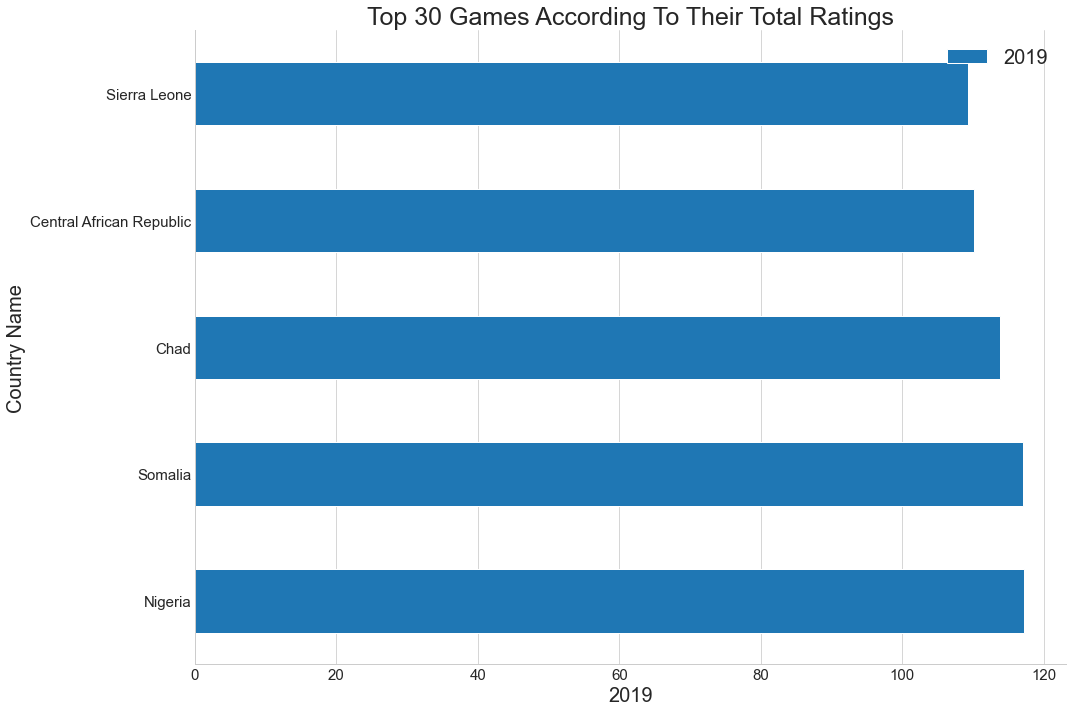

In [49]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cleaned_mortality.plot(x = 'Country Name', y = '2019', fontsize=15, kind='barh', ax=ax, edgecolor='w')

ax.set_title('Top 30 Games According To Their Total Ratings', fontsize=25)
ax.set_xlabel('2019', fontsize=20)
ax.set_ylabel('Country Name', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=20)

plt.tight_layout()
plt.savefig(fname = 'mortality_fig01')

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot world's continents first as base layer
ax1 = continents.plot(figsize=(12, 8), cmap='Set2')

In [ ]:
merged = world.merge(cleaned_mortality, how='left', left_on=None, right_on=None)
merged = merged[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000,
                '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                 '2010', '2011', '2012', '2013', '2014', '2016', '2017', '2018', '2019']]
merged.head

In [ ]:
# set the value column that will be visualised
variable = '2019'

# set the range for the choropleth values
vmin, vmax = 0, 150

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Mortality Rate in 2019', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm)

# create map
continents.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

### Causes of death in children under 5

In [ ]:
cause = pd.read_csv('Databases/causes-of-death-in-children-under-5.csv')
cause.head(2)

In [ ]:
cause.info()

In [ ]:
cause.describe()

In [ ]:
cause.describe(include=object)

In [ ]:
cause.isnull().sum()*100/cause.shape[0]

In [ ]:
cause.duplicated().sum()

#### Since there are 2.14% nulls per cause of deaths, these can also be dropped in the table at it has neglible effect in the aggregated and summarized analysis. 

In [ ]:
cause.dropna(axis=0, inplace=True)
cause.head()

#### Since 2020 is not available and the years below 2000 will not provide any sufficient recent conclusions and recommendations, these years will not be included or will be dropped to accomodate other databases which has lesser years as well. 

In [ ]:
cause.drop(cause.index[cause['Year'] < 2000], inplace=True)
cleaned_cause = cause
cleaned_cause.head()

In [ ]:
cleaned_cause = cleaned_cause.rename(columns={"Entity": "Country Name", "Code": "Country Code"})
cleaned_cause.head()

In [ ]:
cleaned_cause.isnull().sum()*100/cleaned_cause.shape[0]

In [ ]:
cleaned_cause['Country Name'].unique()

In [ ]:
cleaned_cause.to_csv('Databases/cleaned_cause.csv')

<hr>

### Malnutrition across the globe (Data of countries from 1983-2019)

In [ ]:
malnutrition = pd.read_csv('Databases/malnutrition_country_avg.csv')
malnutrition.head()

In [ ]:
malnutrition.info()

In [ ]:
malnutrition.describe()

In [ ]:
malnutrition.describe(include=object)

In [ ]:
malnutrition.isnull().sum()*100/malnutrition.shape[0]

In [ ]:
malnutrition.duplicated().sum()

In [ ]:
malnutrition.dropna(axis=0, inplace=True)
cleaned_malnutrition = malnutrition
cleaned_malnutrition = cleaned_malnutrition.rename(columns={"Country": "Country Name"})
cleaned_malnutrition['Country Name'] = cleaned_malnutrition['Country Name'].str.title()
cleaned_malnutrition.head()

In [ ]:
cleaned_malnutrition.isnull().sum()*100/cleaned_malnutrition.shape[0]

In [ ]:
cleaned_malnutrition['Country Name'].unique()

In [ ]:
countries = pd.read_csv('Databases/countrynamesncodes.csv')
countries.head()

#### Since the table does not contain a country code column, the best solution was to merge with a country code dataset from IBAN using Alpha-3 coding. `See datasets section for the source reference.`

In [ ]:
cleaned_malnutrition = pd.merge(cleaned_malnutrition, countries, how='left', on='Country Name')
column_to_reorder = cleaned_malnutrition.pop('Country Code')
cleaned_malnutrition.insert(1, 'Country Code', column_to_reorder)
cleaned_malnutrition.head()

In [ ]:
cleaned_malnutrition.isnull().sum()*100/cleaned_malnutrition.shape[0]

#### Some countries will not be included in the possible merges because they are not given country codes, but these will not be dropped as the malnutrition table will mostly be utilized for determining the income classification of each country. 

In [ ]:
cleaned_malnutrition.to_csv('Databases/cleaned_malnutrition.csv')

<hr>
<hr>

## Data Visualization